<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK13_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [내용 정리]

## 평균 이동

### 평균 이동(Mean Shift)의 개요

평균 이동(Mean Shift): 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행. 데이터가 모여 있는 **밀도가 가장 높은 곳**으로 이동.
- 데이터의 분포도를 이용해 군집 중심점을 찾음.
   - 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정.
   - KDE(Kernel Density Estimation): 모델의 확률 밀도 함수를 찾음.
- 주변 데이터와의 거리 값을 KDE 함수값으로 입력한 뒤 반환 값을 현재 위치에서 업데이트하며 이동.

KDE(Kernal Denstity Estimation): 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법.
- sum(관측 데이터 각각에 커널 함수를 적용한 값)/데이터 건수 -> 확률 밀도 함수 추정
- ex. 가우시안 분포 함수(대표적인 커널 함수)
- 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화하는 데 적용되며 확률 밀도 추정 성능을 크게 좌우함.
   - 작은 h 값: 과적합 쉬움. 많은 수의 군집 중심점.
   - 큰 h 값: 과소적합 쉬움. 적은 수의 군집 중심점.

bandwidth값의 변화가 군집화 개수에 영향을 미침. 최적화 값으로 설정해야 함.

cluster_centers_: 군집 중심 좌표 표시

이상치의 영향력이 크지 않음.

군집의 개수를 정할 필요 없음.

알고리즘 수행 시간이 오래 걸림.

band_width의 크기에 따른 군집화 영향도가 매우 큼.

## GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개

GMM 군집화: 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정으로 군집화를 수행.
- 모수 추정: 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 어떤 정규 분포에 속하는지 결정하는 방식.
   1. 개별 정규 분포의 평균과 분산
   2. 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- EM(Expectation and Maximization) 방법 적용


### GMM을 이용한 붓꽃 데이터 세트 군집화

**n_components**: 가우시안 모델의 총 개수. 군집의 개수를 정하는 데 중요한 역할을 수행.

### GMM과 K-평균의 비교

KMeans
- 원형의 범위에서 군집화 수행(원형일수록 군집화 효율 높아짐.)

GMM
- KMeans보다 유연하게 다양한 데이터 세트에 잘 적용됨.(군집화를 위한 수행 시간이 오래 걸림.)

# [코드 필사]

## 평균 이동

### 평균 이동(Mean Shift)의 개요

평균 이동(Mean Shift): 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행. 데이터가 모여 있는 **밀도가 가장 높은 곳**으로 이동.
- 데이터의 분포도를 이용해 군집 중심점을 찾음.
   - 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정.
   - KDE(Kernel Density Estimation): 모델의 확률 밀도 함수를 찾음.
- 주변 데이터와의 거리 값을 KDE 함수값으로 입력한 뒤 반환 값을 현재 위치에서 업데이트하며 이동.

KDE(Kernal Denstity Estimation): 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법.
- sum(관측 데이터 각각에 커널 함수를 적용한 값)/데이터 건수 -> 확률 밀도 함수 추정
- ex. 가우시안 분포 함수(대표적인 커널 함수)
- 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화하는 데 적용되며 확률 밀도 추정 성능을 크게 좌우함.
   - 작은 h 값: 과적합 쉬움. 많은 수의 군집 중심점.
   - 큰 h 값: 과소적합 쉬움. 적은 수의 군집 중심점.


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [ ]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


bandwidth값의 변화가 군집화 개수에 영향을 미침. 최적화 값으로 설정해야 함.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth값:',round(bandwidth,3))

bandwidth값: 1.816


In [ ]:
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


cluster_centers_: 군집 중심 좌표 표시

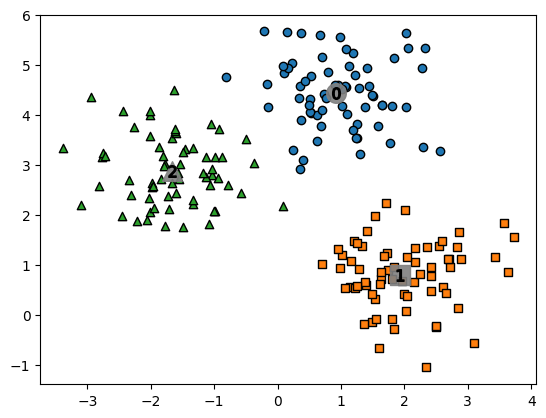

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    center_x_y=centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


이상치의 영향력이 크지 않음.

군집의 개수를 정할 필요 없음.

알고리즘 수행 시간이 오래 걸림.

band_width의 크기에 따른 군집화 영향도가 매우 큼.

## GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개

GMM 군집화: 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정으로 군집화를 수행.
- 모수 추정: 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 어떤 정규 분포에 속하는지 결정하는 방식.
   1. 개별 정규 분포의 평균과 분산
   2. 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- EM(Expectation and Maximization) 방법 적용


### GMM을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

**n_components**: 가우시안 모델의 총 개수. 군집의 개수를 정하는 데 중요한 역할을 수행.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# target값에 따라 gmm_cluster값이 어떻게 매핑되는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


### GMM과 K-평균의 비교

KMeans
- 원형의 범위에서 군집화 수행(원형일수록 군집화 효율 높아짐.)

GMM
- KMeans보다 유연하게 다양한 데이터 세트에 잘 적용됨.(군집화를 위한 수행 시간이 오래 걸림.)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])
    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=markers[label % len(markers)])

        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            # Assuming cluster_result has a .cluster_centers_ attribute
            center_x_y = cluster_result.cluster_centers_[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                        marker=markers[label % len(markers)])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                        marker='$%d$' % label)
    plt.show()

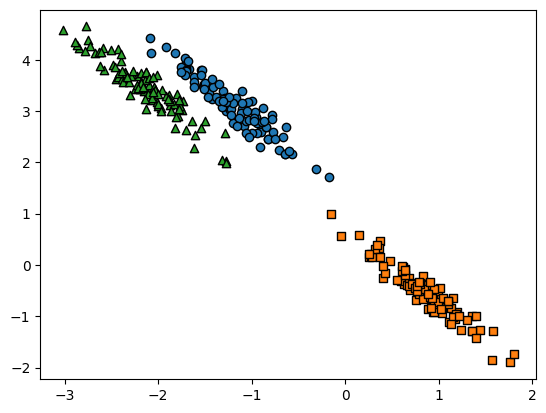

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)
# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

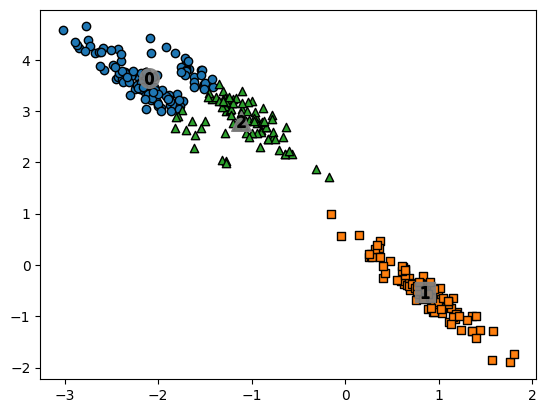

In [ ]:
# 3개의 군집 기반 kmeans를 X_aniso 데이터 세트에 적용
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

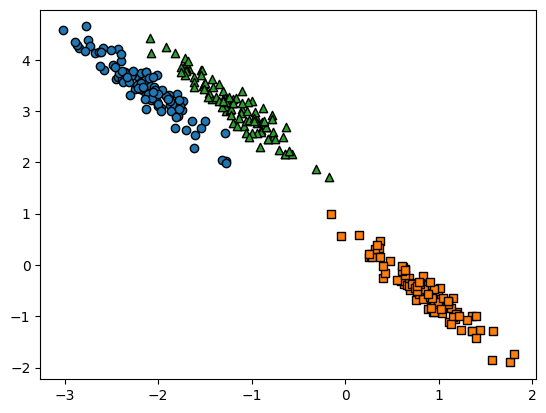

In [ ]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
